In [145]:
import numpy                  as np
import pandas                 as pd
import scipy                  as sp
import sklearn.neighbors      as knn
import matplotlib
import matplotlib.pyplot      as plt
import seaborn
import requests
import urllib
import joblib
import requests
import json
import os
import random
import seaborn as sns
#import statsmodels.api as sm
from matplotlib                           import rcParams
from sklearn                              import discriminant_analysis
from sklearn.decomposition                import PCA
from sklearn                              import preprocessing
from sklearn.linear_model                 import LogisticRegression as LogReg
from sklearn.discriminant_analysis        import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis        import QuadraticDiscriminantAnalysis as QDA
from scipy.stats                          import mode
from sklearn                              import linear_model
from IPython.core.interactiveshell        import InteractiveShell
from time                                 import sleep
from collections                          import Counter
from itertools                            import combinations, permutations

%matplotlib inline

In [146]:
#importing dataset and clean missing values and duplicates

import pandas as pd
df = pd.read_csv('MovieGenre.csv', encoding="ISO-8859-1", usecols=["imdbId", "Title", "Genre", "Poster"])
df.set_index(["imdbId"], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(subset="Poster", keep=False, inplace=True)
df  

,Title,Genre,Poster
imdbId,,,
114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...
...,...,...,...
83291,Los violadores (1981),Action|Thriller,https://images-na.ssl-images-amazon.com/images...
83168,Tanya's Island (1980),Drama,https://images-na.ssl-images-amazon.com/images...
82875,Pacific Banana (1981),Comedy,https://images-na.ssl-images-amazon.com/images...


In [147]:
# extract movie's year information as a separate column 

import re

re_year = re.compile("\((\d{4})\)")
df["year"] = df.Title.map(lambda x: int(re_year.findall(x)[0]) if re_year.findall(x) else None)
df

,Title,Genre,Poster,year
imdbId,,,,
114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,1995.0
113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,1995.0
113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0
114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0
113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0
...,...,...,...,...
83291,Los violadores (1981),Action|Thriller,https://images-na.ssl-images-amazon.com/images...,1981.0
83168,Tanya's Island (1980),Drama,https://images-na.ssl-images-amazon.com/images...,1980.0
82875,Pacific Banana (1981),Comedy,https://images-na.ssl-images-amazon.com/images...,1981.0


In [148]:
#separate genre types to multiple columns
df.columns
df[['maingenre','genre2','genre3']] = df.Genre.str.split("|",expand=True,)
df

,Title,Genre,Poster,year,maingenre,genre2,genre3
imdbId,,,,,,,
114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,1995.0,Animation,Adventure,Comedy
113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,1995.0,Action,Adventure,Family
113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Romance,None
114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Drama,Romance
113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Family,Romance
...,...,...,...,...,...,...,...
83291,Los violadores (1981),Action|Thriller,https://images-na.ssl-images-amazon.com/images...,1981.0,Action,Thriller,None
83168,Tanya's Island (1980),Drama,https://images-na.ssl-images-amazon.com/images...,1980.0,Drama,None,None
82875,Pacific Banana (1981),Comedy,https://images-na.ssl-images-amazon.com/images...,1981.0,Comedy,None,None


In [149]:
df.count

<bound method DataFrame.count of                                      Title                       Genre  \
imdbId                                                                   
114709                    Toy Story (1995)  Animation|Adventure|Comedy   
113497                      Jumanji (1995)     Action|Adventure|Family   
113228             Grumpier Old Men (1995)              Comedy|Romance   
114885            Waiting to Exhale (1995)        Comedy|Drama|Romance   
113041  Father of the Bride Part II (1995)       Comedy|Family|Romance   
...                                    ...                         ...   
83291                Los violadores (1981)             Action|Thriller   
83168                Tanya's Island (1980)                       Drama   
82875                Pacific Banana (1981)                      Comedy   
815258  Werewolf in a Womens Prison (2006)                      Horror   
79142               Xiao zi ming da (1979)               Action|Comedy   

    

In [150]:
#count values for each genre
genre_df=df['maingenre'].value_counts()
genre_df

Drama          9457
Comedy         9327
Action         4556
Documentary    3379
Crime          2434
Horror         1903
Adventure      1617
Animation      1565
Biography      1155
Thriller        390
Short           358
Western         304
Fantasy         269
Mystery         251
Family          241
Romance         197
Sci-Fi          187
Musical         113
War              63
Music            36
History          20
Film-Noir        16
Adult             7
Talk-Show         3
Sport             2
Name: maingenre, dtype: int64

In [151]:
#put genre value counts in dataframe
genre_count = pd.DataFrame(genre_df).reset_index()
genre_count

,index,maingenre
0,Drama,9457
1,Comedy,9327
2,Action,4556
3,Documentary,3379
4,Crime,2434
5,Horror,1903
6,Adventure,1617
7,Animation,1565
8,Biography,1155
9,Thriller,390


In [152]:
#rename genre and counts for plotting
genre_count.columns = ['genre','count']
genre_count

,genre,count
0,Drama,9457
1,Comedy,9327
2,Action,4556
3,Documentary,3379
4,Crime,2434
5,Horror,1903
6,Adventure,1617
7,Animation,1565
8,Biography,1155
9,Thriller,390


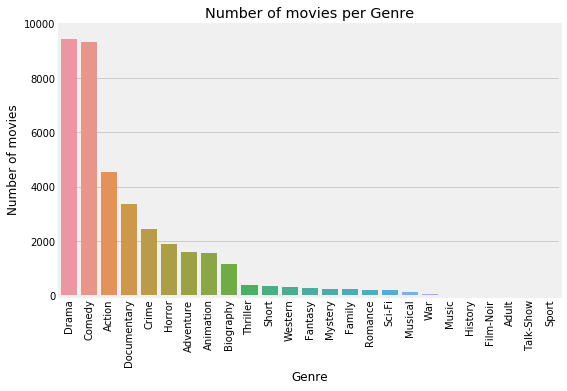

In [153]:
#plotting 
genre_count.sort_values(by="count", ascending=False, inplace=True)

plt.subplots(figsize=(8,5));
sns.barplot(x="genre", y="count", data=genre_count);
plt.xticks(rotation="vertical");
plt.xlabel("Genre");
plt.ylabel("Number of movies");
plt.title("Number of movies per Genre");
plt.ylim((0,10000));

In [156]:
# prepare dataset for image processing 

In [158]:
# Data manipulation
import pandas as pd
import numpy as np

## Image processing
# import skimage

# Data preprocessing
from sklearn.model_selection import train_test_split
#from skmultilearn.model_selection import IterativeStratification, iterative_train_test_split

# Modelling
import keras 
import keras.backend as K
from keras.callbacks import TensorBoard
from keras import optimizers
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.optimizers import Adam, SGD
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

# Transfer Learning
from keras.applications import MobileNet, VGG16

# Model Evaluation
from sklearn.metrics import multilabel_confusion_matrix, classification_report
from sklearn.metrics import hamming_loss, label_ranking_loss, average_precision_score 

# Plotting & Data visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pre-configure Plotting Style 
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
%config InlineBackend.figure_format = 'retina'

# Miscellaneous
import os
import time
import random
import itertools 
from tqdm import tqdm
from collections import Counter

Using TensorFlow backend.


In [ ]:
# convert images to array 
train_images = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img('poster/'+ df['imdbId'][i]+'.jpg', target_size=(250, 200, 3))
    img = image.img_to_array(img)
    img = img/255
    train_images.append(img)

In [ ]:
#display movie index
# Create a generator for random indexes
poster_index = list(range(7243))
rand_index = random.sample(poster_index, 2)

# Select random posters
poster_1, poster_2 = train_images[rand_index[0]], train_images[rand_index[1]]

# Display movie poster and title
fig, ax = plt.subplots(ncols = 4, figsize=(15, 4))
ax[0].imshow(poster_1)
ax[1].imshow(poster_2)
ax[0].set_title('Movie Poster 1', fontsize=14)
ax[1].set_title('Movie Poster 2', fontsize=14)

# Remove axes
for ax in ax:
    ax.axis('off')    
plt.tight_layout()

print('Genre of Movie Poster 1: {} \nGenre of Movie Poster 2: {}'.format(train['Genre'][rand_index[0]], train['Genre'][rand_index[1]]))